<font size=5>This research project is conducted and completed by SIN Chun Hung, a mathematician from The Hong Kong University of Science and Technology. 

# CNN Classification on Images Type of Garbages


In this project, I would like to train a **convolutional neural network** to do **classification of images types of garbage**. A garbage dataset downloaded from Kaggle will be used for this project to achieve the aims. This dataset contains around thousands images with several types of housing garbage. 

In [1]:
project_name='cnn-garbage-type'

In [2]:
# Uncomment and run the appropriate command for your operating system, if required
# No installation is reqiured on Google Colab / Kaggle notebooks

# Linux / Binder / Windows (No GPU)
!pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Linux / Windows (GPU)
# pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
 
# MacOS (NO GPU)
# !pip install numpy matplotlib torch torchvision torchaudio

Looking in links: https://download.pytorch.org/whl/torch_stable.html


## Import the required library and module

In [3]:
import os
import numpy as np
import opendatasets as od

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import random_split

import torchvision
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from torchvision.utils import make_grid

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

## Download the dataset from Kaggle

In [4]:
od.download('https://www.kaggle.com/mostafaabla/garbage-classification/download')

  1%|▏         | 3.00M/239M [00:00<00:08, 30.8MB/s]

100%|██████████| 239M/239M [00:05<00:00, 44.5MB/s] 


## Exploration of dataset and data cleaning plus preprocessing

### Explore number of elements of each of the type of garbage dataset

In [5]:
type_garbage = os.listdir("./garbage-classification/garbage_classification")

In [6]:
print(type_garbage, len(type_garbage))

['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass'] 12


In [7]:
for i in type_garbage:
    print("number of images in", i , ": ", len(os.listdir("./garbage-classification/garbage_classification/" + i)))

number of images in battery :  945
number of images in biological :  985
number of images in brown-glass :  607
number of images in cardboard :  891
number of images in clothes :  5325
number of images in green-glass :  629
number of images in metal :  769
number of images in paper :  1050
number of images in plastic :  865
number of images in shoes :  1977
number of images in trash :  697
number of images in white-glass :  775


From the above, it is not difficult to realize that some types of the garbages have too much elements, especially clothes. There will be a problem if using the current data to create dataloader for training, validation and testing dl as the number of each types are unbalanced. We need to delete some items by considering each type of elements of garbages. 

### Amendment on number of each type of garbages

In [8]:
too_large_classes = []
quite_large_classes = []
suitable_size_classes = []

for i in type_garbage:
    if len(os.listdir("./garbage-classification/garbage_classification/" + i)) >= 1000:
        too_large_classes.append(i)
    elif len(os.listdir("./garbage-classification/garbage_classification/" + i)) >= 900:
        quite_large_classes.append(i)
    else:
        suitable_size_classes.append(i)

print(too_large_classes, quite_large_classes, suitable_size_classes)

['clothes', 'paper', 'shoes'] ['battery', 'biological'] ['brown-glass', 'cardboard', 'green-glass', 'metal', 'plastic', 'trash', 'white-glass']


Too large classes is 'clothes', 'paper', 'shoes'. 


Quite large classes is 'battery', 'biological'. 


Suitable_size_classes is 'brown-glass', 'cardboard', 'green-glass', 'metal', 'plastic', 'trash', 'white-glass'. 


*Our mission is to make amends on the too large classes and quite large classes.*

In [9]:
before_clean_num_clothes = list(range(5326))
before_clean_num_clothes.remove(0)

import random
the_num_to_be_clean_clothes = random.sample( before_clean_num_clothes , 4600)

for i in the_num_to_be_clean_clothes:
    os.remove("./garbage-classification/garbage_classification/clothes/clothes" + str(i) + ".jpg")

len(os.listdir("./garbage-classification/garbage_classification/clothes"))

725

Running the above cell, 4600 images will be deleted from the clothes file, to around 700 images. Below will do the similar process

In [10]:
before_clean_num_paper = list(range(1051))
before_clean_num_paper.remove(0)
the_num_to_be_clean_paper = random.sample(before_clean_num_paper , 300)

for i in the_num_to_be_clean_paper:
    os.remove("./garbage-classification/garbage_classification/paper/paper" + str(i) + ".jpg")

len(os.listdir("./garbage-classification/garbage_classification/paper"))

750

In [11]:
before_clean_num_shoes = list(range(1978))
before_clean_num_shoes.remove(0)
the_num_to_be_clean_shoes = random.sample(before_clean_num_shoes , 1220)

for i in the_num_to_be_clean_shoes:
    os.remove("./garbage-classification/garbage_classification/shoes/shoes" + str(i) + ".jpg")

len(os.listdir("./garbage-classification/garbage_classification/shoes"))

757

Up untill now, *too large classes* have been modified ! Now just focus on *quite large classes*.

In [12]:
before_clean_num_battery = list(range(946))
before_clean_num_battery.remove(0)
the_num_to_be_clean_battery = random.sample(before_clean_num_battery , 200)

for i in the_num_to_be_clean_battery:
    os.remove("./garbage-classification/garbage_classification/battery/battery" + str(i) + ".jpg")

len(os.listdir("./garbage-classification/garbage_classification/battery"))

745

In [13]:
before_clean_num_biological = list(range(986))
before_clean_num_biological.remove(0)
the_num_to_be_clean_biological = random.sample(before_clean_num_biological , 200)

for i in the_num_to_be_clean_biological:
    os.remove("./garbage-classification/garbage_classification/biological/biological" + str(i) + ".jpg")

len(os.listdir("./garbage-classification/garbage_classification/biological"))

785

Delete process done! Let's run the below code to see each folders number of images! 

In [14]:
for i in type_garbage:
    print("number of images in", i , ": ", len(os.listdir("./garbage-classification/garbage_classification/" + i)))

number of images in battery :  745
number of images in biological :  785
number of images in brown-glass :  607
number of images in cardboard :  891
number of images in clothes :  725
number of images in green-glass :  629
number of images in metal :  769
number of images in paper :  750
number of images in plastic :  865
number of images in shoes :  757
number of images in trash :  697
number of images in white-glass :  775


The number shows that it is far better than the before now ! 

### Transforming into Dataset Loader. Spliting into train_dl, valid_dl

In [15]:
dataset = ImageFolder("./garbage-classification/garbage_classification", transform = tt.ToTensor() )

In [16]:
dataset_classes = dataset.classes
dataset_classes

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

In [17]:
len(dataset)

8995

#### Testing one of an image ( Size can be not equal each image in the real world ) . 

In [18]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

torch.Size([3, 180, 280]) 0
Label:  battery (0)


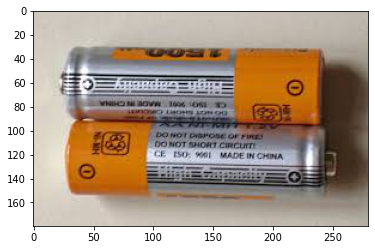

In [19]:
img,label = dataset[0]
print(img.shape, label)
show_example(img,label)

torch.Size([3, 259, 194]) 5
Label:  green-glass (5)


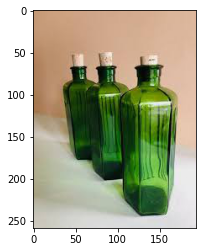

In [20]:
img,label = dataset[3985]
print(img.shape,label)
show_example(img,label)

Each images obviously not the same, making CNN feels inconvenient to do predictions. The below line will do the correction to transform all images to the same size. 

### Starting transformation and splitting 

In [21]:
# stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
data_tfms = tt.Compose([tt.Resize(size=(92, 92)),
                        tt.RandomCrop(92, padding=6 , padding_mode='reflect'), 
                        tt.RandomHorizontalFlip(),
#                       tt.Normalize(*stats,inplace=True),
                        tt.ToTensor()])

In [22]:
dataset = ImageFolder("./garbage-classification/garbage_classification", data_tfms)

We are going to split the dataset into 3 parts:

1. **Training set**
2. **Validation set** 
3. **Test set**

There is no predefined validation set and test set, we then set aside a small portion (995 images) of the training set to be used as the test set. Therefore, 8000 images are left. Using 7000 images as training set and 1000 images as validation set for this project.

In [23]:
random_seed = 42
torch.manual_seed(random_seed);

In [24]:
test_size = 995
train_size = len(dataset) - test_size

train_ds, test_ds = random_split(dataset, [train_size, test_size])
len(train_ds), len(test_ds)

(8000, 995)

In [25]:
val_size = 1000
train__size = train_size - val_size

train__ds, val_ds = random_split(train_ds, [train__size, val_size])
len(train__ds), len(val_ds)

(7000, 1000)

train__ds , val_ds and test_ds are the train set, validation set and test set respectively. Below will create 

In [26]:
batch_size = 100
train_dl = DataLoader(train__ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [27]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([]) # Not show x-axis and y-axis
        ax.imshow(make_grid(images, nrow=10).permute(1, 2, 0)) # plot the images in that batch and permute the dimension  
        break

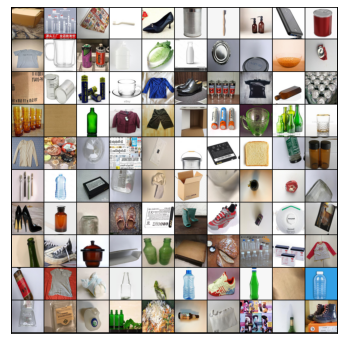

In [28]:
show_batch(train_dl)

## Modeling part ( Training, Validation , Final Test , Conclusion, Save Model ) 

This project will construct a simple convolutional neural network for classification on garbages types.


We will define several convolutional layers for detection of patterns of images along with the retified linear units for capturing the non-linear relationship between pixels and class labels (its probability). There could be some max-pooling layer in the network for size reduction of parameters too. 


Besides, there will be the regularization techniques applied in the network. First is learning rate scheduling which is for varying the rate from low to specific high, from that high to the low. Second is gradient clipping to limit the range of value of gradient to small enough to prevent undesirable change in parameters.The third one is weight decay to avoid the weights becoming too large.



This model architecture is simplier than the model defined and used in Lesson 5 of this course. This is just the more complicated version than Lesson 4 to simplier the process of define and workload for CPU running. 



##### accuracy function

In [29]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

##### get_learning rate function

In [30]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

##### Class extend of nn.Module

In [31]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

Each image is in 3-dimensional size 3 x 92 x 92. While constructing the convolutional layers and others, we should take that into consideration.

In [32]:
class MyNetwork(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),                            # 32 x 92 x 92
            
            nn.Conv2d(32, 64, kernel_size=3 , stride=1, padding=1),
            nn.ReLU(),                            # 64 x 92 x 92 
            nn.MaxPool2d(2, 2),                   # 64 x 46 x 46 
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),                   
            nn.ReLU(),                            # 128 x 46 x 46
            
            nn.Conv2d(128, 256, kernel_size=3 , stride=1, padding=1),
            nn.ReLU(),                            # 256 x 46 x 46
            nn.MaxPool2d(2, 2),                   # 256 x 23 x 23 

            nn.Conv2d(256, 256, kernel_size=4, stride=1, padding=0),   
            nn.BatchNorm2d(256),
            nn.ReLU(),                            # 256 x 20 x 20                     
            nn.MaxPool2d(4, 4),                   # 256 x 5 x 5
    
            nn.Flatten(),   
            nn.Linear(256*5*5 , 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 12))
        
    def forward(self, xb):
        return self.network(xb)    

### fit_one_cycle function for the training and validation process for the model 

In [33]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
            
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()  # Add the key value pair of train_loss to result
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

### Construction of our convolutional neural network

In [34]:
testing_epochs = MyNetwork()
testing_epochs

MyNetwork(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 256, kernel_size=(4, 4), stride=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=6400, out_fea

Before we start training the model, let's just use the model constructed above to randomly guess and do classification.

In [ ]:
# history_no_train = [evaluate(model, val_dl)]
# history_no_train

##### Testing the best epochs

We will put the following hyperparameters into the fit function defined above to find out which epochs is the best for the future model. 

In [35]:
epochs = 20
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.SGD

The next cell will train the model with those hyperparameters, storing every epochs results into history list with all printing messages for further analysis. 

In [36]:
%%time
history = fit_one_cycle(epochs, max_lr, testing_epochs, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00103, train_loss: 2.2106, val_loss: 1.9320, val_acc: 0.4160
Epoch [1], last_lr: 0.00278, train_loss: 1.5243, val_loss: 1.6221, val_acc: 0.4540
Epoch [2], last_lr: 0.00518, train_loss: 1.3028, val_loss: 1.3684, val_acc: 0.5420
Epoch [3], last_lr: 0.00759, train_loss: 1.1777, val_loss: 1.5654, val_acc: 0.4850
Epoch [4], last_lr: 0.00935, train_loss: 1.1136, val_loss: 1.5161, val_acc: 0.4840
Epoch [5], last_lr: 0.01000, train_loss: 1.0301, val_loss: 1.2061, val_acc: 0.5980
Epoch [6], last_lr: 0.00987, train_loss: 0.9476, val_loss: 1.2400, val_acc: 0.5930
Epoch [7], last_lr: 0.00950, train_loss: 0.8778, val_loss: 0.9936, val_acc: 0.6690
Epoch [8], last_lr: 0.00891, train_loss: 0.8147, val_loss: 1.2681, val_acc: 0.5550
Epoch [9], last_lr: 0.00812, train_loss: 0.7661, val_loss: 0.8633, val_acc: 0.7190
Epoch [10], last_lr: 0.00717, train_loss: 0.6966, val_loss: 1.0682, val_acc: 0.6310
Epoch [11], last_lr: 0.00611, train_loss: 0.6617, val_loss: 1.0736, val_acc: 0.6550
Ep

##### Accuracy vs number of epochs 

In [37]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, 'r-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

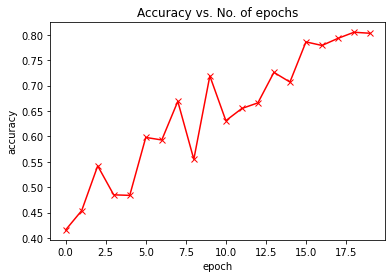

In [38]:
plot_accuracies(history)

##### Loss value vs number of epochs

In [39]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

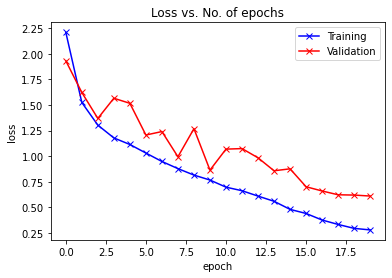

In [40]:
plot_losses(history)

From the above observation, it is believed that **there are three possibilities**. 

The **first** is that the model still not yet attain its optimal using epochs = 20. i.e. it may improves its validation accuracy using larger number of epochs. 


The **second** possibility is that this model has already attained its optimal using this number of epoch = 20 at around epoch 18. Adding more epochs may decrease the validation accuracy as it is leaving away from the maximum point. 


The **third** possibility is that this model is fluctuating around 80% accuracy while increasing the number of epochs which is larger than 20. 

## Computer System, Project Aims and Future Work Plus Summary

##### Computer System 

As the reason of lacking advance computer system for the GPU training, it is my very limitation to do a complicated convolutional neural network with the attempt of trying several combination of hyperparameters to find out the very best possible set of value of hyperparameters to make the model strongest.  

##### Project aims and learning objective

Therefore, in order to do a revision of what I have learned from this deep learning course and get a feeling of all the require codes creating neural network, it is my decision to try to use CPU to finish the report and achieve all the mentioned goals. 

##### Future Work and Summary

This project has created the simple convolutional neural network which levels is in between Lesson 4 and Lesson 5. Several convolutional layers, batchnorms, ReLU and linear classifier layer. Plus the three regularization techniques.

As I can just use CPU system, just assume other parameters is optimal, just need to adjust the number of epochs. 

By the fact of possibility of second and third, we find that the model is achieved the maximum at epoch around 18-19. 

These are the optimal parameters for our simple CPU model! 

epochs = 20
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.SGD

In the future, after gaining the ability of GPU accessment, I can modified the model structure to do a more complicated nerual networks and trying different possible hyperparameter to make the model perfect. I will go through to obtain the answer at that time coming in order to learn more data science and make myself better.

## Save and Commit

In [41]:
model = testing_epochs

In [42]:
torch.save(model.state_dict(), 'cnn-model-cpu.pth')

In [1]:
project_name = "deep-learning-project-by-sinchunhung"

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

In [45]:
jovian.reset()
jovian.log_hyperparams(arch='MyNetwork', 
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [46]:
jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   time='3h12min56s')

[jovian] Metrics logged.


In [47]:
jovian.commit(project=project_name, environment=None, outputs=['cnn-model-cpu.pth'])

<IPython.core.display.Javascript object>

[jovian] Creating a new project "sinchunsimon/cnn-garbage-type"
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/sinchunsimon/cnn-garbage-type


'https://jovian.ai/sinchunsimon/cnn-garbage-type'